In [36]:
import networkx as nx
import matplotlib.pyplot as plt

### 1.4

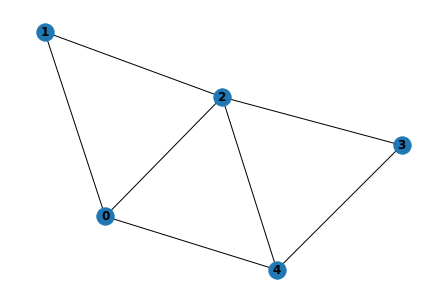

In [37]:
g1 = nx.Graph()
g1.add_edges_from([(0, 1), (1,2), (0,2), (2,3), (3,4), (4,0), (2,4)])
nx.draw(g1, with_labels=True, font_weight="bold")

In [38]:
len(list(nx.all_simple_paths(g1, 0, 2)))

4

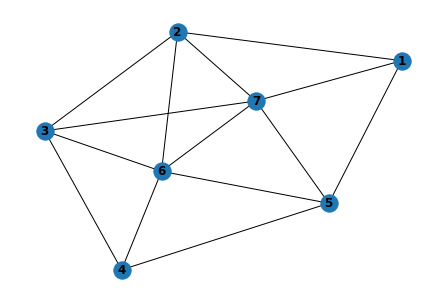

In [39]:
g2 = nx.Graph()
g2.add_edges_from([(i, i+1) for i in range(1, 7)])
g2.add_edges_from([(7,1), (7,2), (7,3), (7,5), (6,2) , (6,3), (6,4), (1,5)])
nx.draw(g2, with_labels=True, font_weight="bold")

In [40]:
len(list(nx.all_simple_paths(g2, 1, 5)))

43

### 1.9

In [115]:
def eulerian(graph):
    try:
        return list(nx.eulerian_circuit(graph))
    except nx.NetworkXError as nxx:
        return "Не эйлеров граф"

#### а)

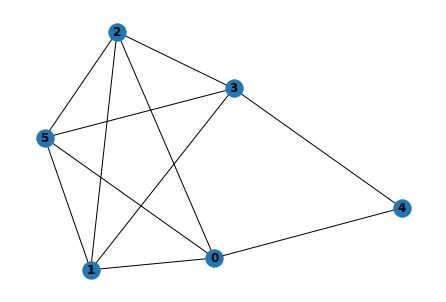

In [116]:
g3 = nx.Graph()
g3.add_edges_from([(i, i+1) for i in range(4)])
g3.add_edges_from([(4,0), (0,5), (0,2), (1,5), (1,3) , (2,5), (3,5)])
nx.draw(g3, with_labels=True, font_weight="bold")

In [117]:
eulerian(g3)

[(0, 5),
 (5, 3),
 (3, 2),
 (2, 5),
 (5, 1),
 (1, 3),
 (3, 4),
 (4, 0),
 (0, 2),
 (2, 1),
 (1, 0)]

#### б)

In [118]:
eulerian(g1)

'Не эйлеров граф'

#### в)

In [119]:
eulerian(g2)

'Не эйлеров граф'

#### г)

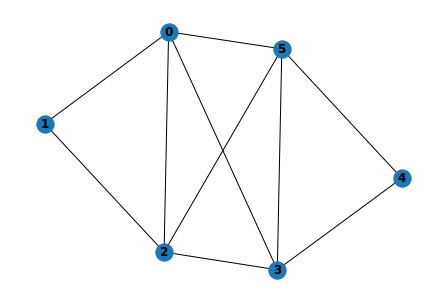

In [120]:
g4 = nx.Graph()
g4.add_edges_from([(i, i+1) for i in range(5)])
g4.add_edges_from([(5,0), (0,2), (0,3), (2,5), (3,5)])
nx.draw(g4, with_labels=True, font_weight="bold")

In [121]:
eulerian(g4)

[(0, 3),
 (3, 5),
 (5, 4),
 (4, 3),
 (3, 2),
 (2, 5),
 (5, 0),
 (0, 2),
 (2, 1),
 (1, 0)]

#### д)

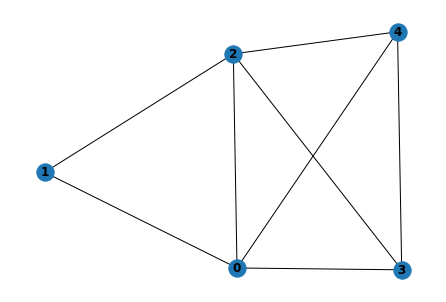

In [122]:
g5 = nx.Graph()
g5.add_edges_from([(i, i+1) for i in range(4)])
g5.add_edges_from([(4,0), (0,2), (0,3), (2,4)])
nx.draw(g5, with_labels=True, font_weight="bold")

In [123]:
eulerian(g5)

'Не эйлеров граф'

#### е)

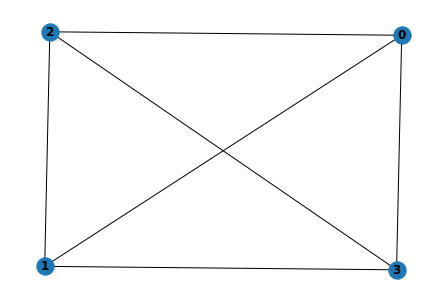

In [124]:
g6 = nx.Graph()
g6.add_edges_from([(i, i+1) for i in range(3)])
g6.add_edges_from([(3,0), (0,2), (1,3)])
nx.draw(g6, with_labels=True, font_weight="bold")

In [125]:
eulerian(g6)

'Не эйлеров граф'

#### ж)

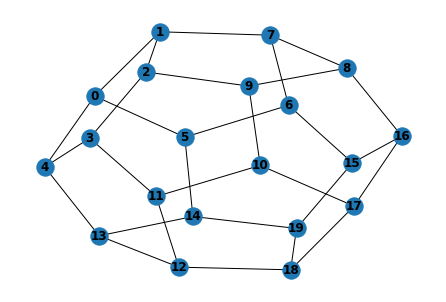

In [126]:
g7 = nx.Graph()
g7.add_edges_from([(i, i+1) for i in range(4)])
g7.add_edges_from([(i, i+1) for i in range(5, 14)])
g7.add_edges_from([(i, i+1) for i in range(15, 19)])
g7.add_edges_from([(4,0), (14,5), (0, 5), (1,7), (2,9), (3, 11), (4, 13),
                  (19,15), (15,6), (16, 8), (17, 10), (18, 12), (19, 14)])
nx.draw(g7, with_labels=True, font_weight="bold")

In [127]:
eulerian(g7)

'Не эйлеров граф'

#### з)

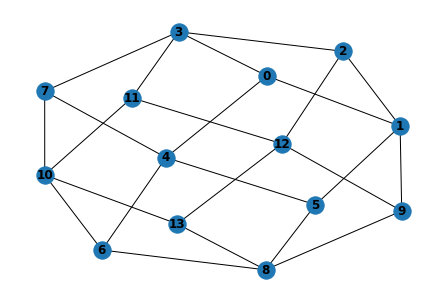

In [128]:
g8 = nx.Graph()
g8.add_edges_from([(i, i+1) for i in range(3)])
g8.add_edges_from([(3,0), (0,4), (4, 5), (4,6), (4,7), (5,1), (5, 8),
                  (8,9), (9,1), (8, 6), (6, 10), (10, 7), (7, 3), 
                  (3, 11),(11, 10), (11, 12), (12, 9), (12, 13), (12, 2),
                  (13, 8), (10, 13)])
nx.draw(g8, with_labels=True, font_weight="bold")

In [129]:
eulerian(g8)

'Не эйлеров граф'

#### и)

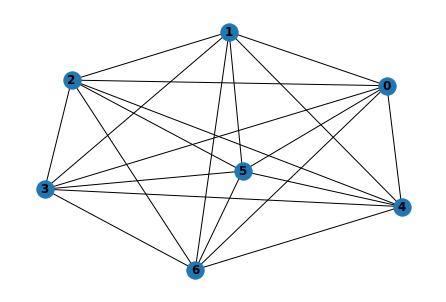

In [130]:
g9 = nx.Graph()
g9.add_edges_from([(i, j) for i in range(7) for j in range(i+1, 7)])
nx.draw(g9, with_labels=True, font_weight="bold")

In [131]:
eulerian(g9)

[(0, 6),
 (6, 5),
 (5, 4),
 (4, 6),
 (6, 3),
 (3, 5),
 (5, 2),
 (2, 4),
 (4, 3),
 (3, 2),
 (2, 6),
 (6, 1),
 (1, 5),
 (5, 0),
 (0, 4),
 (4, 1),
 (1, 3),
 (3, 0),
 (0, 2),
 (2, 1),
 (1, 0)]

### 1.10

In [188]:
def hamiltonian(G):
    F = [(G,[list(G.nodes())[0]])]
    n = G.number_of_nodes()
    while F:
        graph,path = F.pop()
        confs = []
        neighbors = (node for node in graph.neighbors(path[-1]) 
                     if node != path[-1]) #exclude self loops
        for neighbor in neighbors:
            conf_p = path[:]
            conf_p.append(neighbor)
            conf_g = nx.Graph(graph)
            conf_g.remove_node(path[-1])
            confs.append((conf_g,conf_p))
        for g,p in confs:
            if len(p)==n:
                return p
            else:
                F.append((g,p))
    return None

#### а)

[0, 2, 5, 1, 3, 4]

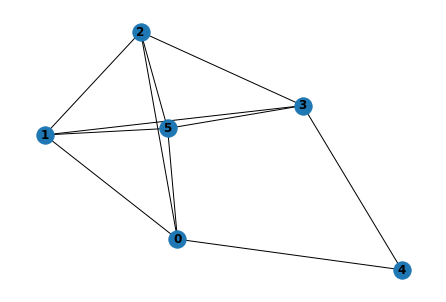

In [192]:
nx.draw(g3, with_labels=True, font_weight="bold")
hamiltonian(g3)

#### б)

[0, 4, 3, 2, 1]

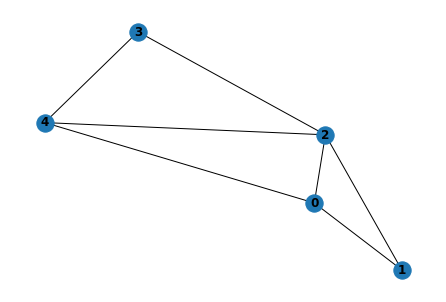

In [193]:
nx.draw(g1, with_labels=True, font_weight="bold")
hamiltonian(g1)

#### в)

[1, 5, 7, 6, 4, 3, 2]

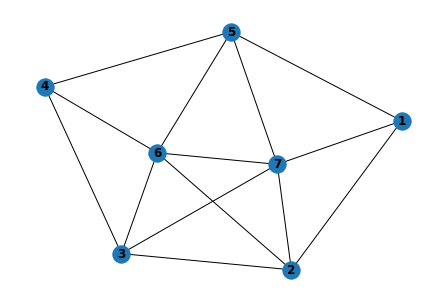

In [194]:
nx.draw(g2, with_labels=True, font_weight="bold")
hamiltonian(g2)

#### г)

[0, 3, 4, 5, 2, 1]

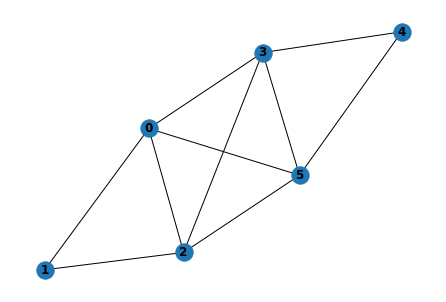

In [195]:
nx.draw(g4, with_labels=True, font_weight="bold")
hamiltonian(g4)

#### д)

[0, 3, 4, 2, 1]

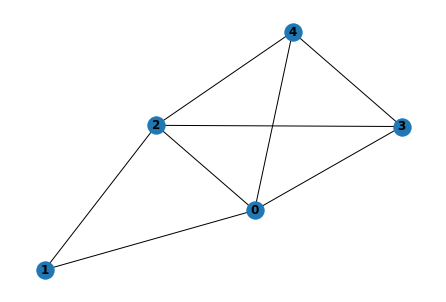

In [196]:
nx.draw(g5, with_labels=True, font_weight="bold")
hamiltonian(g5)

#### е)

[0, 2, 3, 1]

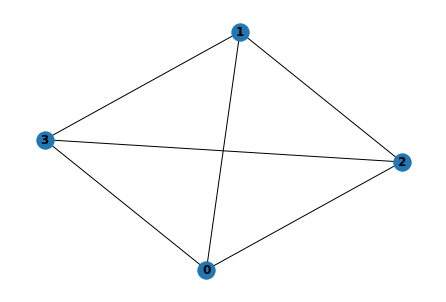

In [197]:
nx.draw(g6, with_labels=True, font_weight="bold")
hamiltonian(g6)

#### ж)

[0, 5, 14, 19, 18, 17, 16, 15, 6, 7, 8, 9, 10, 11, 12, 13, 4, 3, 2, 1]

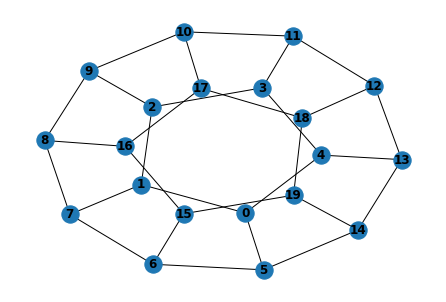

In [198]:
nx.draw(g7, with_labels=True, font_weight="bold")
hamiltonian(g7)

#### з)

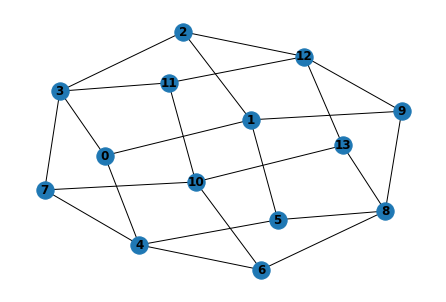

In [203]:
nx.draw(g8, with_labels=True, font_weight="bold")
hamiltonian(g8)

#### и)

[0, 6, 5, 4, 3, 2, 1]

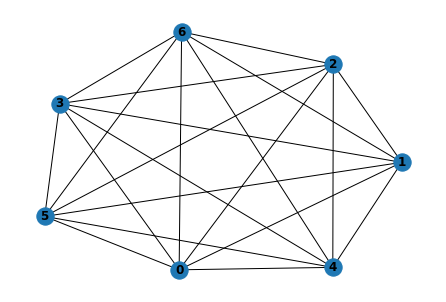

In [202]:
nx.draw(g9, with_labels=True, font_weight="bold")
hamiltonian(g9)

### 1.12

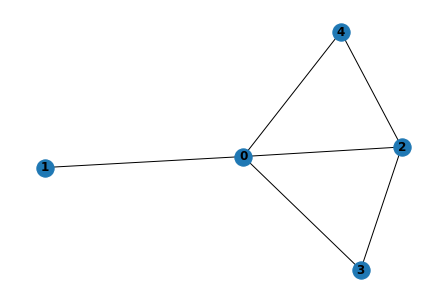

In [223]:
g10 = nx.Graph()
g10.add_edges_from([(i, j) for i in range(0, 5, 2) for j in range(i+1, 5)])
nx.draw(g10, with_labels=True, font_weight="bold")

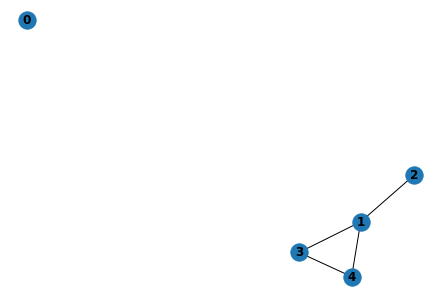

In [224]:
g10_с = nx.complement(g10)
nx.draw(g10_с, with_labels=True, font_weight="bold")

### 1.13)

[4, 4, 3, 3, 2, 4]

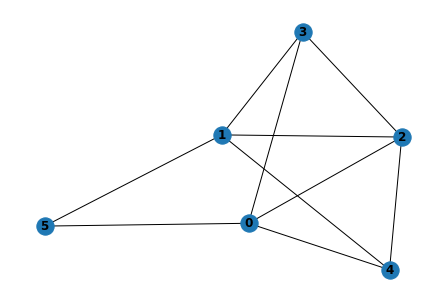

In [230]:
g11 = nx.Graph()
g11.add_edges_from([(i, j) for i in range(2) for j in range(2, 6)])
g11.add_edges_from([(2, j) for j in range(3, 5)])
nx.draw(g11, with_labels=True, font_weight="bold")
[v for k,v in g11.degree]

### 1.15)

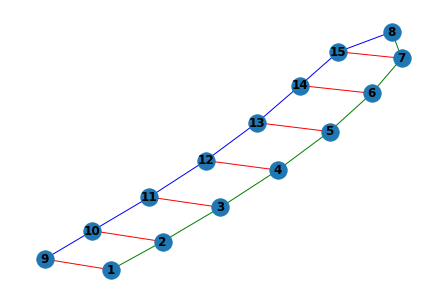

In [247]:
g12 = nx.Graph()
for i in range(1,8):
    g12.add_edge(i, i+8, color="r")
    g12.add_edge(i, i+1, color="g")
    g12.add_edge(i+8, (i+9)%8+8, color="b")
colors = nx.get_edge_attributes(g12,'color').values()
nx.draw(g12, with_labels=True, font_weight="bold", edge_color=colors)

### 1.21

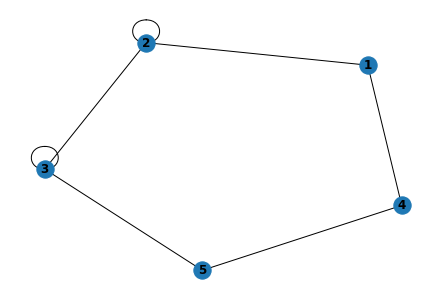

In [252]:
g13 = nx.Graph()
g13.add_edges_from([(1,2), (2,3),(3,5), (5,4), (4,1), (2,2), (3,3)])
nx.draw(g13, with_labels=True, font_weight="bold")

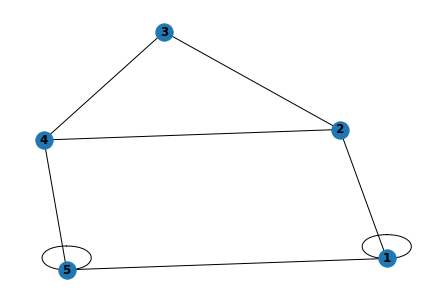

In [253]:
g14 = nx.Graph()
g14.add_edges_from([(1,2), (2,4),(4,5), (5,1), (2,3), (3,4), (1,1), (5,5)])
nx.draw(g14, with_labels=True, font_weight="bold")

In [254]:
nx.is_isomorphic(g13, g14)

False

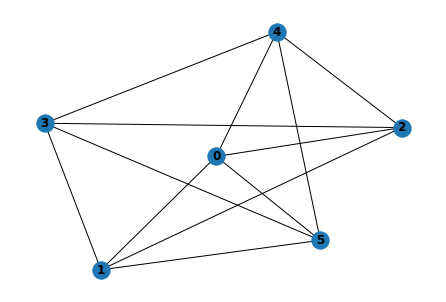

In [261]:
g15 = nx.Graph()
g15.add_edges_from([(0,1), (1,2),(2,3), (3,4), (4,5), (5,0), (0,4), (0,2), (1,5), (1,3), (2,4),
                   (3, 5)])
nx.draw(g15, with_labels=True, font_weight="bold")

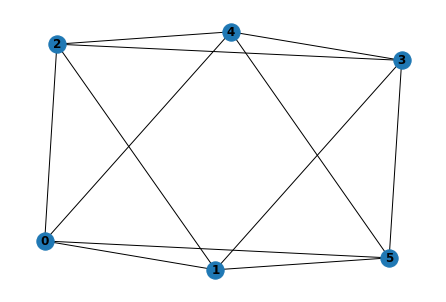

In [262]:
g16 = nx.Graph()
g16.add_edges_from([(0,1), (0,2),(0,4), (0,5), (1,2), (1,3), (1,5), (2,3), (2,4), (3,4), (3,5),
                   (4, 5)])
nx.draw(g15, with_labels=True, font_weight="bold")

In [263]:
nx.is_isomorphic(g15, g16)

True

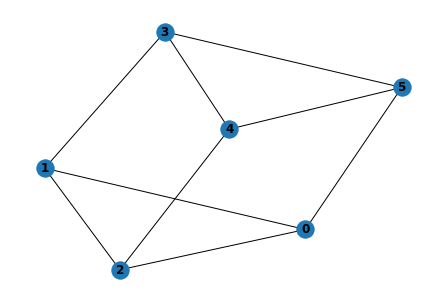

In [264]:
g17 = nx.Graph()
g17.add_edges_from([(0,1), (0,2),(0,5), (1,2), (1,3), (2,4), (3,4), (3,5), (4,5)])
nx.draw(g17, with_labels=True, font_weight="bold")

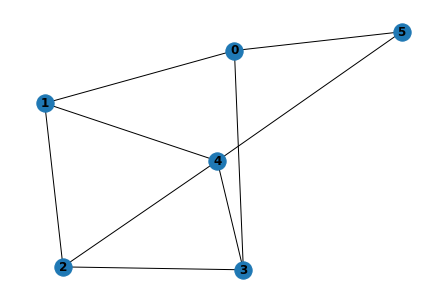

In [270]:
g18 = nx.Graph()
g18.add_edges_from([(0,5), (0,1),(0,3), (1,2), (1,4), (2,4), (2,3), (3,4), (4,5)])
nx.draw(g18, with_labels=True, font_weight="bold")

In [271]:
nx.is_isomorphic(g17, g18)

False

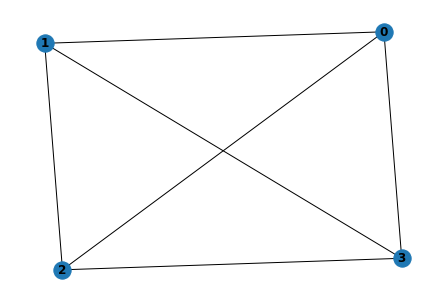

In [273]:
g19 = nx.Graph()
g19.add_edges_from([(i,j) for i in range(3) for j in range(i+1,4)])
nx.draw(g19, with_labels=True, font_weight="bold")

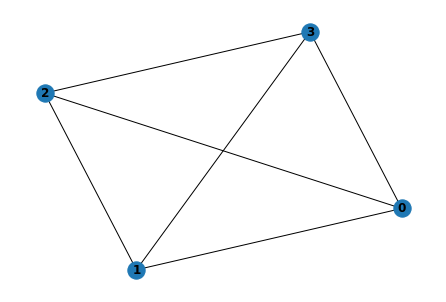

In [274]:
g20 = nx.Graph()
g20.add_edges_from([(i,j) for i in range(3) for j in range(i+1,4)])
nx.draw(g20, with_labels=True, font_weight="bold")

In [275]:
nx.is_isomorphic(g19, g20)

True

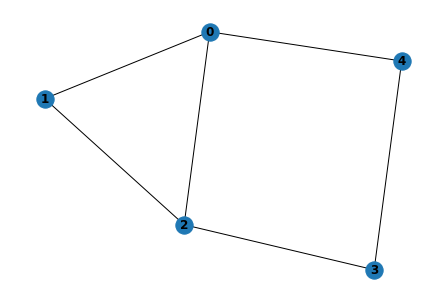

In [276]:
g21 = nx.Graph()
g21.add_edges_from([(i,i+1) for i in range(4)])
g21.add_edges_from([(0,4), (0,2)])
nx.draw(g21, with_labels=True, font_weight="bold")

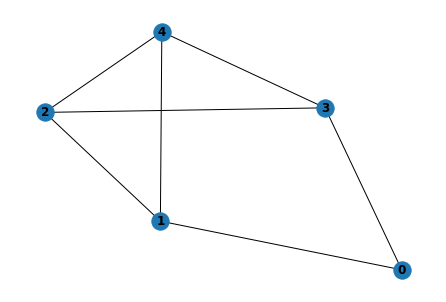

In [277]:
g22 = nx.Graph()
g22.add_edges_from([(i,i+1) for i in range(4)])
g22.add_edges_from([(0,3), (1,4), (2,4)])
nx.draw(g22, with_labels=True, font_weight="bold")

In [278]:
nx.is_isomorphic(g21, g22)

False